In [3]:
import torch.nn as nn
import torch

In [90]:
torch.cuda.empty_cache() 

In [2]:
torch.cuda.is_available()

True

In [ ]:
%%bash
git commit -a -m "playing sound using pygame is not working. Implementing show midi methods alternatively though it does not work on jupyter lab  "

https://www.rileynwong.com/blog/2019/2/25/generating-music-with-an-lstm-neural-network

In [ ]:
from IPython.core.debugger import Pdb

In [5]:
print(device)

cuda


# data preparation

In [6]:
max_sequence_length = 100

In [7]:
def split_list(l, n):
    """
    リストをサブリストに分割する
    :param l: リスト
    :param n: サブリストの要素数
    :return: 
    """
    for idx in range(0, len(l), n):
        yield l[idx:idx + n]

In [8]:
import glob

import score2df

In [9]:
from score2df import *

In [10]:
from importlib import reload

reload(score2df)

## 差分バージョン

In [11]:
is_difference_based = True

In [12]:
is_discrete = True

In [13]:
from music21 import converter, instrument, note, chord

In [14]:
id = str(is_difference_based) + "_"  + str(is_discrete)

In [15]:
pkl_path = 'saved/df_scores_{}.pkl'.format(id)

In [16]:
is_use_preprocessed_df = True

In [17]:
df_scores = pd.DataFrame()
if is_use_preprocessed_df:
    df_scores = pd.read_pickle(pkl_path)
else:
    for file in glob.glob("chorales/midi/*.mid"):
        df_score = score2df(file)
        df_score = add_lags(df_score)
        df_score = df_score.assign(file = file)
        df_scores = df_scores.append(df_score , ignore_index = True )
        
    df_scores.to_pickle(pkl_path)

In [18]:
df_scores.shape

(239796, 10)

In [19]:
df_scores.describe()

,cent,n,dcent,dcent_lag1,dcent_lag2,dcent_lag3
count,239796.000000,239796.000000,237530.000000,235278.000000,233039.000000,230808.000000
mean,190.483578,1.326382,-2.578622,1.792773,1.397191,1.565370
std,972.031414,1.545788,977.908612,979.009075,981.259277,983.706187
min,-3600.000000,0.000000,-5300.000000,-5300.000000,-5300.000000,-5300.000000
25%,-500.000000,0.000000,-300.000000,-300.000000,-300.000000,-300.000000
50%,200.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,900.000000,2.000000,300.000000,300.000000,300.000000,300.000000
max,3100.000000,14.000000,5500.000000,5500.000000,5500.000000,5500.000000


In [20]:
df_stage = df_scores.query('n == 0')

In [21]:
import numpy as np

In [22]:
if is_discrete:
    dtype = str
else:
    dtype = np.float64

In [23]:
note_set = set(df_stage.dcent.astype(dtype))

In [24]:
len(note_set)

108

In [25]:
type(df_scores.dcent[0])

numpy.float64

In [26]:
notes_list = []
for f in set(df_stage.file):
    df_file = df_stage[df_stage.file == f]
    
    for n in set(df_file.n):
        df_file_n = df_file[df_file.n == n]
        
        run_notes = df_file_n.dcent.astype(dtype)
        for n in split_list(run_notes , max_sequence_length):
            if len(n) > 10:
                notes_list.append(n)
        

In [27]:
len(notes_list)

1089

In [28]:
len(notes_list[0])

100

#### linear regresssion


https://www.statsmodels.org/dev/example_formulas.html

In [29]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [30]:
mod = smf.ols(formula = 'dcent ~ dcent_lag1' , data = df_stage)

In [31]:
res = mod.fit()

print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                  dcent   R-squared:                       0.470
Model:                            OLS   Adj. R-squared:                  0.470
Method:                 Least Squares   F-statistic:                 8.157e+04
Date:                Sun, 10 Nov 2019   Prob (F-statistic):               0.00
Time:                        19:56:45   Log-Likelihood:            -7.6526e+05
No. Observations:               92147   AIC:                         1.531e+06
Df Residuals:                   92145   BIC:                         1.531e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.8388      3.223     -0.881      0.3

In [32]:
mod = smf.ols(formula = 'dcent ~ dcent_lag1 + dcent_lag2' , data = df_stage)

In [33]:
res = mod.fit()

print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                  dcent   R-squared:                       0.498
Model:                            OLS   Adj. R-squared:                  0.498
Method:                 Least Squares   F-statistic:                 4.543e+04
Date:                Sun, 10 Nov 2019   Prob (F-statistic):               0.00
Time:                        19:56:47   Log-Likelihood:            -7.5878e+05
No. Observations:               91649   AIC:                         1.518e+06
Df Residuals:                   91646   BIC:                         1.518e+06
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.7590      3.150     -1.193      0.2

In [34]:
mod = smf.ols(formula = 'dcent ~ dcent_lag1 + dcent_lag2 + dcent_lag3' , data = df_stage)

In [35]:
res = mod.fit()

print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                  dcent   R-squared:                       0.548
Model:                            OLS   Adj. R-squared:                  0.548
Method:                 Least Squares   F-statistic:                 3.682e+04
Date:                Sun, 10 Nov 2019   Prob (F-statistic):               0.00
Time:                        19:56:50   Log-Likelihood:            -7.5002e+05
No. Observations:               91151   AIC:                         1.500e+06
Df Residuals:                   91147   BIC:                         1.500e+06
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -4.3727      3.002     -1.457      0.1

In [36]:
?statsmodels.api.add_constant

Object `statsmodels.api.add_constant` not found.


In [37]:
?mod.predict

Signature: mod.predict(params, exog=None)
Docstring:
Return linear predicted values from a design matrix.

Parameters
----------
params : array-like
    Parameters of a linear model
exog : array-like, optional.
    Design / exogenous data. Model exog is used if None.

Returns
-------
An array of fitted values

Notes
-----
If the model has not yet been fit, params is not optional.
File:      ~/anaconda3/envs/test/lib/python3.7/site-packages/statsmodels/regression/linear_model.py
Type:      method


In [38]:
res.predict(df_stage.head())

0            NaN
4            NaN
8            NaN
12           NaN
16   -242.444051
dtype: float64

## preparation I wrote  (note-basedの場合のhead. ただし、dcent baseのほうが良い可能性大.dcent-basedの場合はスキップ)

In [ ]:
from music21 import converter, instrument, note, chord

In [39]:
if not is_difference_based:
    notes_list = []
    note_set = set()
    for file in glob.glob("chorales/midi/*.mid"):
        run_notes = []
        print(file)
        midi = converter.parse(file)
        notes_to_parse = None
        parts = instrument.partitionByInstrument(midi)
        if parts: # file has instrument parts
            #Pdb().set_trace()
            notes_to_parse = parts.parts[0].recurse()
        else: # file has notes in a flat structure
            notes_to_parse = midi.flat.notes
        for element in notes_to_parse:
            if isinstance(element, note.Note):
                run_notes.append(str(element.pitch))
            elif isinstance(element, chord.Chord):
                #Pdb().set_trace()
                run_notes.append('.'.join(str(n) for n in element.normalOrder))
        note_set = note_set | set(run_notes)
        for n in split_list(run_notes , max_sequence_length):
            if len(n) > 10:
                notes_list.append(n)

https://towardsdatascience.com/how-to-generate-music-using-a-lstm-neural-network-in-keras-68786834d4c5

## pre-pack procedures

### for continuous version

In [ ]:
if not is_discrete:
    raw_X = [torch.tensor(np.array(notes_list[i])[0:-1]).reshape([-1,1]) for i in range(len(notes_list))]
    raw_y = [torch.tensor(np.array(notes_list[i])[1:]) for i in range(len(notes_list))]


### with label encoding (for discrete version)
https://towardsdatascience.com/encoding-categorical-features-21a2651a065c
に概ね準拠仕様と思ったが・・・

- そもそもlabelencoder -> onehot  は今後必要ないよとwarning が出る
- onehot の挙動が読みにくい

のでlabelencodingしたあと直にnp.arrayをmanual onehote化したほうがいいのではないか？？

In [41]:
from sklearn.preprocessing import LabelEncoder

In [42]:
if is_discrete:
    le = LabelEncoder()

    le.fit(list(note_set))

    import numpy as np

    labeled_notes_list = [le.transform(np.array(x)) for x in notes_list]

    label_set = set(le.transform(list(note_set)))

    raw_X = [torch.zeros(labeled_notes_list[i].shape[0] - 1 , len(label_set)) for i in range(len(notes_list))]

    for i in range(len(notes_list)):
        for j in range(labeled_notes_list[i].shape[0]-1):
            raw_X[i][j , labeled_notes_list[i][j]] = 1.

    raw_y = [torch.tensor(np.array(x[1:])) for x in labeled_notes_list]

## pad and pack

In [43]:
packed_X = torch.nn.utils.rnn.pack_sequence(raw_X , enforce_sorted=False)

ppd_X = torch.nn.utils.rnn.pad_packed_sequence(packed_X)

packed_y = torch.nn.utils.rnn.pack_sequence(raw_y , enforce_sorted=False)

ppd_y = torch.nn.utils.rnn.pad_packed_sequence(packed_y)

### reference

- [OneHotEncoderだけでいける。LabelEncoderをかます必要なし]と当初思っていたがむしろ逆



https://stackoverflow.com/questions/30869382/encoding-string-to-numbers-so-as-to-use-it-in-scikit-learn

Another possible good reference:
https://stackoverflow.com/questions/30869382/encoding-string-to-numbers-so-as-to-use-it-in-scikit-learn


## mask

In [ ]:
mask = torch.Tensor([len(x) - 1 for x in notes_list])

or

In [44]:
mask = ppd_X[1]

# LTSM

参考文献のpreprocessはあまり納得いかないので・・

https://pytorch.org/tutorials/beginner/nlp/sequence_models_tutorial.html

をみつつやってみるか

## simple model

input_size = len(ohe.get_feature_names())
hidden_size = 50
num_layers = 1

In [ ]:
input_size = ppd_X[0].shape[2]
hidden_size = ppd_X[0].shape[2]
num_layers = 1

In [ ]:
class my_model(nn.Module):

    def __init__(self, input_size, hidden_size, num_layers):
        super(my_model, self).__init__()
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.num_layers = num_layers


        self.rnn = nn.LSTM(input_size = input_size, hidden_size = hidden_size, num_layers = num_layers)

        #self.linear = nn.Linear(hidden_size, input_size) #output dimension has to be identical with the input dimension
        #self.softmax = nn.functional.softmax()


    def forward(self, input):
        sequence_num = input.shape[1]
        self.h0 = torch.randn(self.num_layers , sequence_num , self.hidden_size)
        self.c0 = torch.randn(self.num_layers , sequence_num, self.hidden_size)
        y, (hn, cn) = self.rnn(input, (self.h0, self.c0))
        #y = self.linear(y)
        y = nn.functional.softmax(y , dim = 2)
        return y
    

In [ ]:
model = my_model(input_size , hidden_size , num_layers)

## 参考文献に似せたモデル
https://towardsdatascience.com/how-to-generate-music-using-a-lstm-neural-network-in-keras-68786834d4c5
に似せたモデル
現状ランダムの1.8倍程度の正答率にしかならないと思っていたがsoftmaxを二重にかけていた問題を解決したら劇的にパフォーマンスが向上した

In [45]:
input_size = ppd_X[0].shape[2]
hidden_size = 256 
num_layers = 2
dropout = 0.1

In [46]:
class my_model(nn.Module):

    def __init__(self, input_size, hidden_size, num_layers , dropout):
        #super(my_model, self).__init__()
        
        super().__init__()
        #self.input_size = input_size
        #self.hidden_size = hidden_size
        #self.num_layers = num_layers
        self.relu1 = nn.ReLU()


        self.rnn = nn.LSTM(input_size = input_size, hidden_size = hidden_size, num_layers = num_layers , dropout=dropout)

        self.linear = nn.Linear(hidden_size, input_size) #output dimension has to be identical with the input dimension
        
        
        #self.sm = nn.Softmax(dim = 2)
      


    def forward(self, input):
        #self.h0 = torch.randn(self.num_layers , sequence_num , self.hidden_size)
        #self.c0 = torch.randn(self.num_layers , sequence_num, self.hidden_size)
        y, (hn, cn) = self.rnn(input)#, (self.h0, self.c0))
        y = self.linear(y)
        y = self.relu1(y)
        #y = nn.functional.softmax(y , dim = 2)
        #y = self.sm(y)
        return y
    

In [47]:
model = my_model(input_size , hidden_size , num_layers , dropout)

## dimensionality check

In [ ]:
y_tmp = model.forward(ppd_X[0][:, 0:10])

In [ ]:
y_tmp.shape

##    連続バージョン

https://stackoverflow.com/questions/49040180/change-tanh-activation-in-lstm-to-relu

In [ ]:
class LSTMCell(nn.Module):
    def __init__(self, input_size, hidden_size, nlayers, dropout):
        """"Constructor of the class"""
        super(LSTMCell, self).__init__()

        self.nlayers = nlayers
        self.dropout = nn.Dropout(p=dropout)

        ih, hh = [], []
        for i in range(nlayers):
            ih.append(nn.Linear(input_size, 4 * hidden_size))
            hh.append(nn.Linear(hidden_size, 4 * hidden_size))
        self.w_ih = nn.ModuleList(ih)
        self.w_hh = nn.ModuleList(hh)

    def forward(self, input, hidden):
        """"Defines the forward computation of the LSTMCell"""
        hy, cy = [], []
        for i in range(self.nlayers):
            hx, cx = hidden[0][i], hidden[1][i]
            gates = self.w_ih[i](input) + self.w_hh[i](hx)
            i_gate, f_gate, c_gate, o_gate = gates.chunk(4, 1)

            i_gate = F.sigmoid(i_gate)
            f_gate = F.sigmoid(f_gate)
            c_gate = F.tanh(c_gate)
            o_gate = F.sigmoid(o_gate)

            ncx = (f_gate * cx) + (i_gate * c_gate)
            nhx = o_gate * F.tanh(ncx)
            cy.append(ncx)
            hy.append(nhx)
            input = self.dropout(nhx)

        hy, cy = torch.stack(hy, 0), torch.stack(cy, 0)
        return hy, cy

# criterion (cross entropy lossはlog softmaxを含んでいるので二重に作用させないよう注意が必要）

cross entropy for one-hot representation
https://discuss.pytorch.org/t/cross-entropy-with-one-hot-targets/13580/4

one-hotのままでなくて、Rでいうところのfactorに戻したほうがよさそう（？）


In [67]:
criterion = nn.CrossEntropyLoss(reduction='sum')


input has to be a Tensor of size either (minibatch, C)(minibatch,C) or (minibatch, C, d_1, d_2, ..., d_K)

# GPU tool

In [51]:
is_use_gpu = True


In [52]:
device = torch.device("cuda" if torch.cuda.is_available() and is_use_gpu else "cpu")

In [54]:
model.to(device)

my_model(
  (relu1): ReLU()
  (rnn): LSTM(108, 256, num_layers=2, dropout=0.1)
  (linear): Linear(in_features=256, out_features=108, bias=True)
)

obsolete
#https://qiita.com/elm200/items/46633430c456dd90f1e3

def try_gpu(e):
    if torch.cuda.is_available():
        return e.cuda()
    return e

if is_use_gpu:
    model = try_gpu(model)

# optimizer

In [55]:
import torch.optim as optim# optimizer

In [ ]:
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

In [56]:
optimizer = optim.Adam(model.parameters())

# optimization

In [57]:
from IPython.display import display

In [58]:
sample_size = ppd_X[0].shape[1]

In [59]:
batch_size = 20

In [60]:
batch_indices = range( 0 ,sample_size ,  batch_size)

## n epochs

In [71]:
n_epochs = 500

In [62]:
losses = []

In [63]:
prob_when_random = 1 / len(note_set)

In [64]:
model.train()

my_model(
  (relu1): ReLU()
  (rnn): LSTM(108, 256, num_layers=2, dropout=0.1)
  (linear): Linear(in_features=256, out_features=108, bias=True)
)

In [73]:

for k in range(n_epochs):
    batch_loss = 0
    shuffled_idx = torch.randperm(sample_size)
    for i in batch_indices:
        #display(".")
        batch_samples = shuffled_idx[i:min(i + batch_size , sample_size) ]

        batch_X = ppd_X[0][: , batch_samples]
        batch_y = ppd_y[0][:,  batch_samples]        
        batch_mask = mask[batch_samples]
        
        #if is_use_gpu:
        #    batch_X = try_gpu(batch_X)
        #    batch_y = try_gpu(batch_y)
        batch_X = batch_X.to(device)
        batch_y = batch_y.to(device)

        batch_msk = batch_mask.to(device)# = try_gpu(batch_mask)

        model.zero_grad()

        batch_y_model = model(batch_X)

        loss = 0

        for j in range(batch_y.shape[1]):
            loss += criterion( batch_y_model[0:batch_mask[j] , j ] , batch_y[0:batch_mask[j] , j])
        batch_loss += loss.item()
        loss.backward()

        optimizer.step()
    batch_loss /= torch.sum(mask).item()
    losses.append(batch_loss)
    mean_correct_prob = np.exp(-batch_loss)
    
    if k % 10 == 0:
        display("epoch : {}   loss : {}   correct prob : {} correct / random : {}".format(k , batch_loss ,
                                                                        mean_correct_prob ,
                                                                        mean_correct_prob / prob_when_random))


'epoch : 0   loss : 0.8285156053110253   correct prob : 0.43669703620558714 correct / random : 47.163279910203414'

'epoch : 10   loss : 0.8343191707150747   correct prob : 0.4341699764653539 correct / random : 46.89035745825822'

'epoch : 20   loss : 0.8196892315388936   correct prob : 0.4405685480434879 correct / random : 47.5814031886967'

'epoch : 30   loss : 0.8236773876734418   correct prob : 0.43881499093992926 correct / random : 47.39201902151236'

'epoch : 40   loss : 0.827169977637369   correct prob : 0.4372850633665904 correct / random : 47.22678684359177'

'epoch : 50   loss : 0.7980023374750705   correct prob : 0.4502274689060746 correct / random : 48.62456664185606'

'epoch : 60   loss : 0.7946329479441816   correct prob : 0.4517470191671022 correct / random : 48.78867807004704'

'epoch : 70   loss : 0.801750249539129   correct prob : 0.4485432141347176 correct / random : 48.4426671265495'

'epoch : 80   loss : 0.7837250797179977   correct prob : 0.45670158889548806 correct / random : 49.32377160071271'

'epoch : 90   loss : 0.7894630442522157   correct prob : 0.4540885552920971 correct / random : 49.04156397154649'

'epoch : 100   loss : 0.7863699612109106   correct prob : 0.455495263312566 correct / random : 49.19348843775713'

'epoch : 110   loss : 0.7864573300381723   correct prob : 0.45545546896400524 correct / random : 49.18919064811257'

'epoch : 120   loss : 0.7857542320972092   correct prob : 0.4557758113692803 correct / random : 49.223787627882274'

'epoch : 130   loss : 0.7828667880905245   correct prob : 0.45709374031155564 correct / random : 49.366123953648014'

'epoch : 140   loss : 0.7887010772747981   correct prob : 0.4544346876300117 correct / random : 49.07894626404127'

'epoch : 150   loss : 0.7850434594471404   correct prob : 0.4560998795063056 correct / random : 49.25878698668101'

'epoch : 160   loss : 0.7857147058154292   correct prob : 0.4557938268484691 correct / random : 49.22573329963466'

'epoch : 170   loss : 0.7843637541366003   correct prob : 0.4564099983993324 correct / random : 49.2922798271279'

'epoch : 180   loss : 0.7812992922792741   correct prob : 0.45781079467788116 correct / random : 49.44356582521117'

'epoch : 190   loss : 0.7843724445573373   correct prob : 0.4564060320216525 correct / random : 49.29185145833847'

'epoch : 200   loss : 0.7858834902157928   correct prob : 0.4557169024527166 correct / random : 49.217425464893395'

'epoch : 210   loss : 0.7832442337166007   correct prob : 0.4569212448344478 correct / random : 49.347494442120365'

'epoch : 220   loss : 0.7785831889138174   correct prob : 0.459055946332869 correct / random : 49.578042203949856'

'epoch : 230   loss : 0.7873553461675081   correct prob : 0.4550466461988739 correct / random : 49.14503778947839'

'epoch : 240   loss : 0.7832758378467558   correct prob : 0.4569068044641443 correct / random : 49.34593488212759'

'epoch : 250   loss : 0.7834029813960688   correct prob : 0.45684871540422234 correct / random : 49.33966126365601'

'epoch : 260   loss : 0.7830948802056797   correct prob : 0.45698949272298217 correct / random : 49.354865214082075'

'epoch : 270   loss : 0.7813503898246698   correct prob : 0.4577874022676699 correct / random : 49.44103944490835'

'epoch : 280   loss : 0.7811802970387272   correct prob : 0.45786527522491743 correct / random : 49.449449724291085'

'epoch : 290   loss : 0.787142030095694   correct prob : 0.4551437253158331 correct / random : 49.155522334109975'

'epoch : 300   loss : 0.7797621800147839   correct prob : 0.45851504238042556 correct / random : 49.51962457708596'

'epoch : 310   loss : 0.7803523357445693   correct prob : 0.4582445269319443 correct / random : 49.49040890864998'

'epoch : 320   loss : 0.7859844141704169   correct prob : 0.45567091202153925 correct / random : 49.21245849832624'

'epoch : 330   loss : 0.7842331922886141   correct prob : 0.4564695920224049 correct / random : 49.29871593841973'

'epoch : 340   loss : 0.7776019170239347   correct prob : 0.4595066261124254 correct / random : 49.626715620141944'

'epoch : 350   loss : 0.7830434494110847   correct prob : 0.4570129966601224 correct / random : 49.357403639293224'

'epoch : 360   loss : 0.7787423609705094   correct prob : 0.45898288326870784 correct / random : 49.57015139302045'

'epoch : 370   loss : 0.7822386472733601   correct prob : 0.4573809497416552 correct / random : 49.397142572098765'

'epoch : 380   loss : 0.7837658678235923   correct prob : 0.45668296128275004 correct / random : 49.32175981853701'

'epoch : 390   loss : 0.7810096348689229   correct prob : 0.4579434221744396 correct / random : 49.45788959483948'

'epoch : 400   loss : 0.7768542152407861   correct prob : 0.4598503285135748 correct / random : 49.66383547946609'

'epoch : 410   loss : 0.7849278568962964   correct prob : 0.4561526088635815 correct / random : 49.26448175726681'

'epoch : 420   loss : 0.7830654664739546   correct prob : 0.45700293468701053 correct / random : 49.35631694619714'

'epoch : 430   loss : 0.7779678166627814   correct prob : 0.45933852356009025 correct / random : 49.60856054448975'

'epoch : 440   loss : 0.7807075268427773   correct prob : 0.4580817914579823 correct / random : 49.47283347746209'

'epoch : 450   loss : 0.78479901683584   correct prob : 0.45621138337945966 correct / random : 49.27082940498165'

'epoch : 460   loss : 0.7788892307438848   correct prob : 0.45891547750671463 correct / random : 49.562871570725186'

'epoch : 470   loss : 0.7791015397512523   correct prob : 0.45881805595932157 correct / random : 49.55235004360673'

'epoch : 480   loss : 0.7825202268827598   correct prob : 0.4572521787229775 correct / random : 49.38323530208157'

'epoch : 490   loss : 0.780162142244945   correct prob : 0.45833169035090027 correct / random : 49.49982255789723'

In [74]:
import matplotlib.pyplot as plt
%matplotlib inline

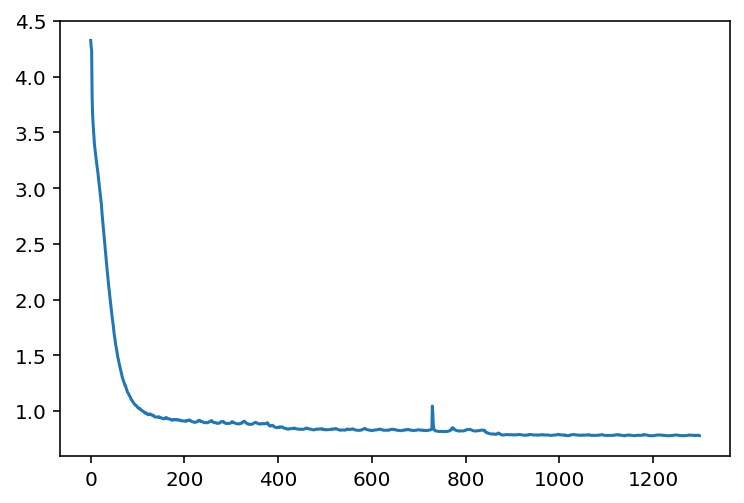

In [75]:
plt.plot(losses)

## check errors using plotnine

In [84]:
from plotnine import *

In [ ]:
ggplot(pd.DataFrame({'n':range(len(losses)) , 'loss':losses}) , aes(x = 'n' , y ='loss')) + geom_point()

## predicted vs realized

In [76]:
model.eval()

my_model(
  (relu1): ReLU()
  (rnn): LSTM(108, 256, num_layers=2, dropout=0.1)
  (linear): Linear(in_features=256, out_features=108, bias=True)
)

In [77]:
model.to(device)

my_model(
  (relu1): ReLU()
  (rnn): LSTM(108, 256, num_layers=2, dropout=0.1)
  (linear): Linear(in_features=256, out_features=108, bias=True)
)

In [78]:
y_pred_idx = model(ppd_X[0].to(device)).detach().cpu().numpy().argmax(axis = 2)

In [79]:
y_pred = [[float(le.classes_[x]) for x in y_pred_idx[0:mask.numpy()[i] , i]] for i in range(y_pred_idx.shape[1])]

In [80]:
y_realized = [[float(le.classes_[x]) for x in ppd_y[0].cpu().numpy()[0:mask.numpy()[i] , i]] for i in range(y_pred_idx.shape[1])]

In [81]:
from itertools import chain

In [82]:
df_scatter = pd.DataFrame({'pred':chain.from_iterable(y_pred) , 'realized':chain.from_iterable(y_realized)})

In [83]:
df_scatter.head()

,pred,realized
0,-100.0,1500.0
1,-1700.0,-1700.0
2,-100.0,-100.0
3,-200.0,1300.0
4,-100.0,-100.0


/home/toshinao/anaconda3/envs/test/lib/python3.7/site-packages/plotnine/scales/scale.py:93: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(self.breaks) and cbook.iterable(self.labels):
/home/toshinao/anaconda3/envs/test/lib/python3.7/site-packages/plotnine/utils.py:553: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  return cbook.iterable(var) and not is_string(var)


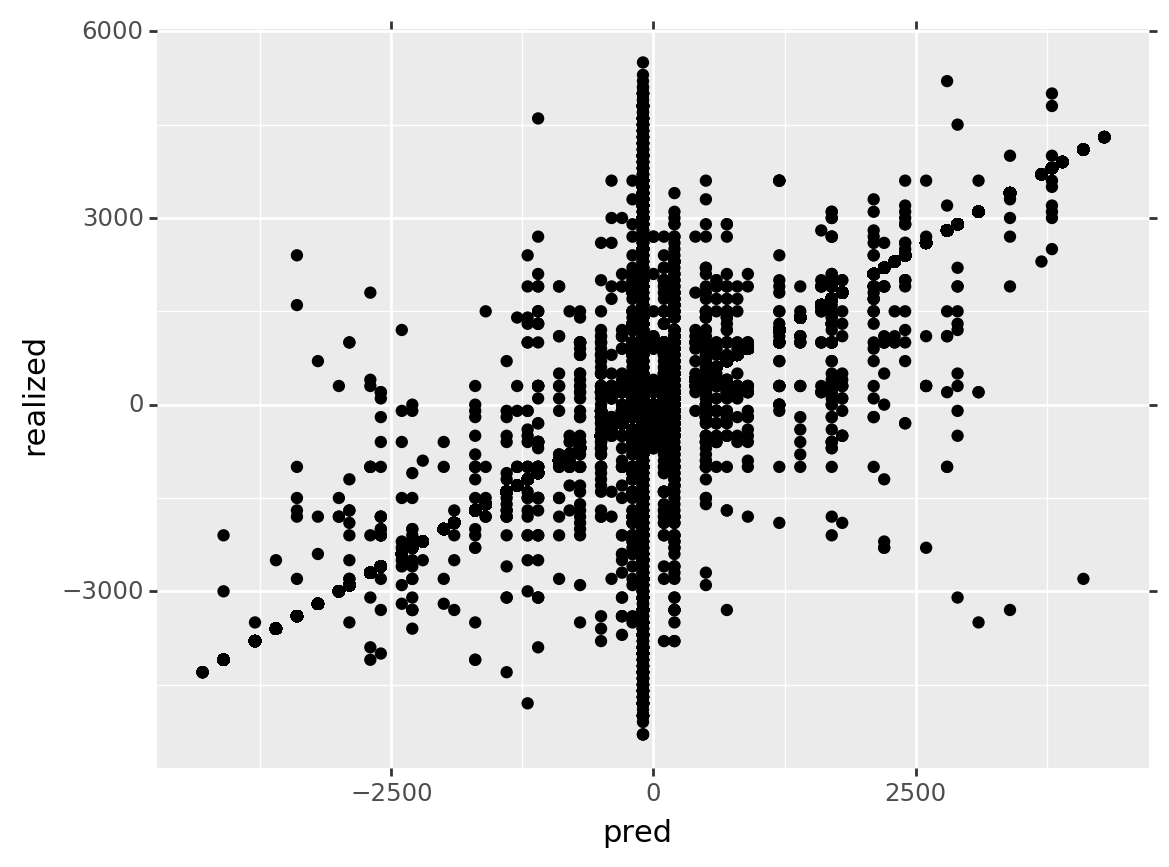

<ggplot: (-9223363251586541820)>

In [85]:
ggplot(df_scatter , aes(x = 'pred', y = 'realized')) + geom_point()

### save model

https://qiita.com/jyori112/items/aad5703c1537c0139edb

In [ ]:
model_path = 'saved/model20191027_{}'.format(id)

In [ ]:
model_path = 'saved/model20191103_{}'.format(id)

In [86]:
model_path = 'saved/model20191110_{}'.format(id)

In [88]:
torch.save(model.state_dict() , model_path)

### load model

In [ ]:
model = my_model(input_size , hidden_size , num_layers , dropout)
model.load_state_dict(torch.load(model_path, map_location='cpu'))

# generating music

In [89]:
device = torch.device("cpu")

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [91]:
model.eval()

my_model(
  (relu1): ReLU()
  (rnn): LSTM(108, 256, num_layers=2, dropout=0.1)
  (linear): Linear(in_features=256, out_features=108, bias=True)
)

In [92]:
x_gen = np.zeros(input_size , dtype = "float32")

In [93]:
x_gen[0] = 1.

In [94]:
x_gen = x_gen.reshape([1,1,-1])

In [95]:
x_gen = torch.tensor(x_gen).to(device)

In [96]:
model = model.to(device)

In [97]:
N_gen = 100

In [98]:
for i in range(N_gen):    
    x1 = model.forward(x_gen)
    x_gen = torch.cat([x_gen, x1[-1:]] , dim = 0)

In [99]:
x_gen.shape

torch.Size([101, 1, 108])

## alternative generation method

一番後ろだけアップデートするのでなく、まるごと（最初以外）置き換える手法も試してみる

In [ ]:
device = torch.device("cpu")

In [ ]:
x_gen = np.zeros(input_size , dtype = "float32")

In [ ]:
x_gen[0] = 1.

In [ ]:
x_gen = x_gen.reshape([1,1,-1])

In [ ]:
x_gen = torch.tensor(x_gen).to(device)

In [ ]:
model = model.to(device)

In [ ]:
N_gen = 100

In [ ]:
for i in range(N_gen):    
    x1 = model.forward(x_gen)
    x_gen = torch.cat([x_gen[:1] , x1] , dim = 0)

In [ ]:
x_gen.shape

## to score

In [100]:
x_gen2 = x_gen.cpu().detach().numpy()

In [101]:
x_gen2.shape

(101, 1, 108)

In [102]:
xidx_gen = x_gen2.argmax(axis = 2).reshape(-1)

In [103]:
xidx_gen.shape

(101,)

In [104]:
shift_gen= np.array( [float(le.classes_[xidx_gen[i]]) for i in range(xidx_gen.shape[0])])

In [105]:
shift_cumsum_gen = shift_gen.cumsum()

In [106]:
from music21 import *

In [107]:
st1=stream.Stream()

In [108]:
dt = 0.5
base_note = note.Note("C5")

In [109]:
for i in range(shift_cumsum_gen.shape[0]):
    run_shift = int(shift_cumsum_gen[i] / 100)
    if run_shift == 0:
        run_note = base_note
    else:                                      
        run_note = base_note.transpose(interval.ChromaticInterval(run_shift))
    st1.insert(0.5 * i , run_note)

StreamException: the object (<music21.note.Note C>, id()=140564281517560) is already found in this Stream (<music21.stream.Stream 0x7fd7ac116908>, id()=140564281518344)

In [110]:
from IPython.display import Image

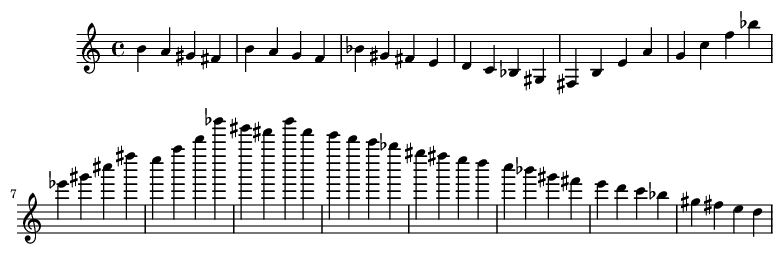

In [111]:
Image(filename=st1.write('lily.png'))

## to midi file

In [112]:
st1.write('midi', fp ='tmp/rnn_generated.midi' )

'tmp/rnn_generated.midi'

## playing sound (fail)

jupyter lab上でのmidiファイル再生はいまのところできていない。一度ファイルに落として、jupyter notebook(labではなく）でplay_sound.ipynbで確認するのが現段階での最善手


In [ ]:
import pygame
freq = 44100    # audio CD quality
bitsize = -16   # unsigned 16 bit
channels = 2    # 1 is mono, 2 is stereo
buffer = 1024    # number of samples
pygame.mixer.init(freq, bitsize, channels, buffer)
pygame.mixer.music.set_volume(0.8)

In [ ]:
sp = midi.realtime.StreamPlayer(st1)
sp.play()

In [ ]:
st1.show('midi')

# 比較用にlinear modelを用いてgenerate

In [ ]:
df_stage.columns

In [ ]:
sequence_gen = [800,200,0]

In [ ]:
N_gen = 100

noise_strength = 0.1 #1にするとmseの誤差項の大きさをそのまま使う

In [ ]:
for i in range(N_gen):
    df_gen = pd.DataFrame({'dcent_lag1':[sequence_gen[-1]] , 'dcent_lag2':[sequence_gen[-2]] , 'dcent_lag3':[sequence_gen[-3]]})
    sequence_gen.append(int(res.predict(df_gen + noise_strength * np.sqrt(res.mse_resid) * np.random.normal()) / 100) * 100)

In [ ]:
sequence_gen[0:20]

In [ ]:
shift_cumsum_gen = np.array(sequence_gen).cumsum() 

In [ ]:
st1=stream.Stream()

In [ ]:
dt = 0.5
base_note = note.Note("C5")

In [ ]:
for i in range(shift_cumsum_gen.shape[0]):
    run_shift = int(shift_cumsum_gen[i] / 100)
    if run_shift == 0:
        run_note = base_note
    else:                                      
        run_note = base_note.transpose(interval.ChromaticInterval(run_shift))
    st1.insert(0.5 * i , run_note)

In [ ]:
run_shift == 0

In [ ]:
from IPython.display import Image

In [ ]:
Image(filename=st1.write('lily.png'))

## to midi file

In [ ]:
st1.write('midi', fp ='tmp/tmp.midi' )

## sandbox

In [ ]:
tmp = note.Note("D5")

In [ ]:
tmp.transpose(interval.GenericInterval(1))

In [ ]:
y_tmp = model.forward(ppd_X[0][:, 0:10].to(device))

In [ ]:
,rex0 = np.zeros(input_size , dtype = "float32")

In [ ]:
x0[0] = 1.

In [ ]:
x0 = x0.reshape([1,1,-1])

In [ ]:
x0 = torch.tensor(x0).to(device)

In [ ]:
model = model.to(device)

In [ ]:
x1 = model.forward(x0)

In [ ]:
x1.shape

In [ ]:
x = torch.cat([x0, x1] , dim = 0)

In [ ]:
x2 = model.forward(x)

In [ ]:
x2.shape

In [ ]:
x2[-2:-1].shape

In [ ]:
x = torch.cat([x, x2[-2:-1]] , dim = 0)

# my own try and error　（この節のプロセスは必要ない）

# Before starting the note...
Useful tips for jupyter notebook:

https://www.dataquest.io/blog/jupyter-notebook-tips-tricks-shortcuts/

In [ ]:
#http://d.hatena.ne.jp/naraba/20121201/p1
#http://web.mit.edu/music21/doc/usersGuide/usersGuide_01_installing.html

from music21 import *
#environment.set('musicxmlPath' , r"C:\Program Files (x86)\Finale NotePad 2012\Finale NotePad.exe")
#configure.run()
#environment.keys()
#environment.get('musicxmlPath')

楽譜を表示するためのおまじない

参考URL:https://groups.google.com/forum/#!topic/music21list/FmU6HeNm7AM


In [ ]:
us = environment.UserSettings() #不必要

#us.create()
us['musicxmlPath'] = r'C:\Program Files (x86)\MuseScore 2\bin\MuseScore.exe'
us['musescoreDirectPNGPath'] = r'C:\Program Files (x86)\MuseScore 2\bin\MuseScore.exe'

# install musescore in linux (apt-getでインストールするのがポイント）

For all those who will struggle with displaying scores from music21 within Jupyter Notebook on Linux (e.g. Ubuntu), follow these steps:
https://stackoverflow.com/questions/49939275/python-music21-library-create-png-from-stream/49945456#49945456

MuseScoreのバージョンが2から3にあがっていたので、初期設定のままではうごきませんでした。
https://qiita.com/nofrmm/items/c3662555b145f6b42d92

#us.create()
us['musicxmlPath'] = r'/snap/bin/musescore'
us['musescoreDirectPNGPath'] = r'/snap/bin/musescore'

In [ ]:
environment.set("musescoreDirectPNGPath", "/usr/bin/musescore")
#environment.set("musicxmlPath", "/snap/bin/musescore")

#us.create()
us['musicxmlPath'] = r'/snap/bin/musescore.mscore'
us['musescoreDirectPNGPath'] = r'/snap/bin/musescore.mscore'

In [ ]:
%load_ext music21.ipython21　#不必要

# sandbox

# シンプルな例からスタート

## note
### noteの追加

insert works as expected if it is "Note to Stream"

In [ ]:
st1=stream.Stream()
st1.insert(0,note.Note("B-5"))

In [ ]:
st1.show()

位置を指定して挿入する場合はinsertを使う

In [ ]:
st1=stream.Stream()
st1.insert(0,note.Note("B-4"))
st1.insert(1,note.Note("B-4"))
st1.insert(2,note.Note("B#3"))
st1.insert(3,note.Note("B#3"))
st1.insert(4 , note.Note("B3"))
st1.insert(4 , note.Note("B2"))
st1.insert(5 , note.Note("C4"))
st1.insert(9 , note.Note("C4"))
st1.show()

appendは最後に追加してくれるので位置の指定をしなくてよくて便利

In [ ]:
st1.append(note.Note("C4"))
st1.show()

### 音のシフト
C4をMajor 3rd(長三度)だけシフトした音すなわちE4を追加

In [ ]:
st1=stream.Stream()
st1.insert(0 , note.Note("C4"))
st1.insert(6 , note.Note("C4").transpose("M3"))
st1.show()

E4をdouble diminished 6th（重減６度？）だけシフトした音を追加。
ただし、double diminishedやdouble augumentedが実際に使われることはまれとのこと。
（https://en.wikipedia.org/wiki/Interval_(music)#Main_intervals
を参照。日本語版wikipediaはいまいちなので英語版を見ること）



その他の参考URL：

http://guitarchord-lab.com/theory/interval.html



In [ ]:
st1 = stream.Stream()
st1.append(note.Note("E4"))
st1.append(note.Note("E4").transpose("M6"))
st1.append(note.Note("E4").transpose("m6"))
st1.append(note.Note("E4").transpose("d6"))
st1.append(note.Note("E4").transpose("dd6"))
st1.show()

なお、例えばC4の重減六度なるものは存在しないっぽい。したがって普通にラ（長６度・Major 6th）がappendされてしまう。

In [ ]:
st1=stream.Stream()
st1.append(note.Note("C4"))
st1.append(note.Note("C4").transpose("M6"))
st1.append(note.Note("C4").transpose("m6"))
st1.append(note.Note("C4").transpose("d6"))
st1.append(note.Note("C4").transpose("dd6"))
st1.show()

そして６度には完全６度というものは存在しない

In [ ]:
st1=stream.Stream()
st1.append(note.Note("C4").transpose("P6")) #returns error

完全５度がなぜ完全ともみなされてきたか？それはドとソの周波数比がほぼほぼ2:3になっているから。
すなわち、$2^{7/12}\approx 1.5$であるから：

In [ ]:
print(2**(7/12))

同様に完全４度はほぼほぼ３：４になっている。すなわち、
$2^{5/12}\approx\frac{4}{3}$：

In [ ]:
print(2**(5/12))

（時間的な）offsetの範囲を調べるには以下のようにすればいいだろう（？）

In [ ]:
st1 = stream.Stream()
st1.append(note.Note("E4"))
st1.append(note.Note("E4").transpose("M6"))
st1.append(note.Note("E4").transpose("m6"))
st1.append(note.Note("E4").transpose("d6"))
st1.append(note.Note("E4").transpose("dd6"))
max_offset = max([x.offset for x in st1])
print(max_offset)

最後に付け加えるのをinsertでやるのであれば、以下のようにすればよいだろう

In [ ]:
st1.insert(max_offset + 1 , note.Note("C3"))
st1.show()

appendは以下のようにまとめて行うことができる（ただし、和音を付け加えるような動作ではない）

In [ ]:
st1.append([note.Note("D4") , note.Note("E4")])
st1.show()

以下のように和音を追加することはできない・・

In [ ]:
st1.insert(max_offset + 1 , [note.Note("D4") , note.Note("E4")]) #returns error

あるoffsetの範囲を切り取るには・・・

In [ ]:
st1.getElementsByOffset(0,4).show()

ただし、ヒエラルヒーがある場合の切り取り方はまだ試行削除中・・

### 音の高さの差

#### 半音を100とするfloatで取出

In [ ]:
interval.notesToChromatic(note.Note("D5") , note.Note("D#4")).cents

In [ ]:
run_diff = interval.notesToChromatic(note.Note("D4") , note.Note("D4#"))

In [ ]:
run_diff.cents

#### 逆

In [ ]:
note.Note("C0").transpose(1).nameWithOctave

### 音の大きさ（velocity)

In [ ]:
n= note.Note("B-4")
n.volume.velocity = 200

### テンポ

In [ ]:
run_score = stream.Score()
bpm = 180
run_score.insert(0.0, tempo.MetronomeMark(number=bpm)) 

### 音のoffset

floatで指定されている場合とfraction.fractionで指定されている場合があるので統計処理する場合はfloat()でcastしてやる必要がある

## 楽器の指定、key signature（調記号・調号）の追加など

In [ ]:
st3=stream.Stream()
st3.append(note.Note("C4"))
st3.append(instrument.ElectricGuitar())
st3.append(note.Note("C4"))
st3.append(instrument.Piano())
st3.append(note.Note("C4"))
st3.append(key.KeySignature(1))
st3.append(note.Note("C4"))
st3.append(key.KeySignature(2))

上記でいいのか？
(慣習的にどうかはともかく入力として許容されるのか？)

↑たぶんダメ。楽器はinsertで指定すべき！

In [ ]:
st3.getInstrument()

In [ ]:
[x for x in st3.getInstruments()]

### 楽器名の文字列での取り出し方

In [ ]:
st3.getInstrument().instrumentName

## score, part, measureについて

scoreとPartとMeasureがstreamの基本的なsubclass

scoreがpartを複数含み、partはmeasureを複数持つ、というのが基本的なScoreの構成（deep jazzの例のようにそうでないヒエラルヒーを持つ場合もある）。
この「基本的な構成」を持つ例としてバッハの楽譜xmlファイルを読み込む

In [ ]:
s_bach = corpus.parse('bach/bwv65.2.xml')

このscoreは４つのPartから構成される。

各Partは各楽器に対応していて、それぞれひとつずつPartがある。

In [ ]:
[type(x) for x in s_bach.getElementsByClass(stream.Stream)] #a lot of "Part"s

このBachの例ではPartはmeasure(小節)から成る。

In [ ]:
[" ".join([str(type(y)) for y in x.getElementsByClass(stream.Stream)]) for x in s_bach.getElementsByClass(stream.Stream)]

ただし、

http://web.mit.edu/music21/doc/usersGuide/usersGuide_06_stream2.html

に注意があるように、PartはtimeSignatureやkeySignatureなども格納できるので、getElementByClassでアクセスするほうが安全:

In [ ]:
print(len([x for x in s_bach]))
print(len([type(x) for x in s_bach.getElementsByClass(stream.Stream)] ))

### appendの動作
noteを追加すると後ろに音を追加
streamのsubclassを追加した場合はヒエラルヒーを構成する、けれど時間的順序はnoteを追加した場合と同じ？？？

In [ ]:
st0 = stream.Stream()
st0.append(note.Note("D4"))
st1 = stream.Stream()
st1.append(note.Note("C4"))
st0.append(st1)
st0.show()

In [ ]:
st0 = stream.Stream()
st0.append(note.Note("D4"))
st1 = stream.Stream()
st1.append(note.Note("C4"))
st2 = stream.Stream()
st2.append(st0)
st2.append(st1)
st2.show()

In [ ]:
[type(i) for i in st2]

In [ ]:
st0 = stream.Stream()
st0.insert(0, note.Note("D4"))
st1 = stream.Stream()
st1.insert(0,note.Note("C4"))
st2 = stream.Stream()
st2.append(st0)
st2.append(st1)
st2.show()

In [ ]:
[type(i) for i in st2]

In [ ]:
st0 = stream.Stream()
st0.insert(0, note.Note("D4"))
st1 = stream.Stream()
st1.insert(0,note.Note("C4"))
st2 = stream.Stream()
st2.insert(0 , st0)
st2.insert(0, st1)
st2.show()

In [ ]:
[type(i) for i in st2]

### 上記のヒエラルヒーと異なる構造を持つ例

deepjazzの例では

Score (midi_data) > Part (melody_stream) > Voice (melody1,2 , melody_voice) ＞ Note

という階層に従ってデータを切り出しているように見える。
すなわちPartはMeasureを持たず、その代わり（？）にVoice(声)を持っている：

In [ ]:
s_jazz = converter.parse('C:/Users/t/PycharmProjects/deepjazz_in_a_file/midi/original_metheny.mid')

In [ ]:
s_jazz_parts = [x for x in s_jazz.getElementsByClass(stream.Part)]
len(s_jazz_parts)

partは楽器が指定してあったりなかったり。

In [ ]:
[x.getInstrument() for x in s_jazz.getElementsByClass(stream.Part)]

In [ ]:
s_jazz_part0_voices = [x for x in s_jazz_parts[0].getElementsByClass(stream.Voice)]
len(s_jazz_part0_voices)

partの構成要素であるvoiceにも同様にinstrumentが指定してあったりしなかったり。おそらく、partレベルで指定しておき、それが構成要素であるvoiceに遺伝している形か

In [ ]:
[x.getInstrument() for x in s_jazz_parts[a].getElementsByClass(stream.Voice)]

In [ ]:
s_jazz_part0_voices.show()

In [ ]:
s_jazz_part0_voices[0].show()

VoiceのなかにMeasureがあるかと思いきやそんなものはない：

In [ ]:
len(s_jazz_part0_voices[0].getElementsByClass(stream.Measure))

ではなにが入っているかといえば、（ScoreのなかのPartのなかの）各PartのVoice[0]はおおむねChordから構成されている（他はnote.Rest, note.Noteが少々）：

In [ ]:
"   ".join([str(type(x)) for x in s_jazz_part0_voices[0]])

おそらく各パートのvoice[1]以降はおおむねnoteから構成されている（？）

であるが、deepjazzでchordパートを切り出す際にはそのように決め打つことなく、solo_stream[0]からremoveByClassでnoteを除外しつつすべてのchordを抽出している。
また、melodyパートはsolo_stream[-1]から特に除外操作をすることなくすべてのnoteを抽出できている（？）

In [ ]:
"   ".join([str(type(x)) for x in s_jazz_part0_voices[1]])

http://www.mathgram.xyz/entry/plotly の下のほうを参考に（上の方は冗長）

In [ ]:

# Get melody part, compress into single voice.
melody_stream = s_jazz[5]     # For Metheny piece, Melody is Part #5.
melody1, melody2 = melody_stream.getElementsByClass(stream.Voice)

In [ ]:
# import plotly as offline mode
import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode(connected=False)

from sklearn.datasets import load_iris
import pandas as pd
import numpy as np

iris = load_iris()
columns = iris.feature_names

# make dataframe
df = pd.DataFrame(iris.data, columns=columns)

# make trace
trace = go.Scatter(
    x = np.array([float(j.offset) for j in melody1][0:1000]),
    y = np.array([float(j.offset) for j in melody2][0:1000]),
    mode = "markers")

# define layout
layout = go.Layout(
    showlegend=False)

data = [trace]
fig = dict(data=data, layout=layout)
offline.iplot(fig)

### voice（声）とは？

https://detail.chiebukuro.yahoo.co.jp/qa/question_detail/q125207687
参照。
- 例えば合唱であれば、３声というのは三人で歌っているイメージ。
- ピアノの場合、おなじことをひとりでできてしまうので単一のピアノパートのなかに複数のvoiceがありえる（ということか？）

さらに推理すれば、

- midiのなかのpartの分け方に恣意性はないが、そのなかのvoiceへの切り方には恣意性がある（切り分け方を変えても出てくる音は変わらない）ために、partのなかのvoiceはそもそもmergeすべき存在であると言えるか
- メセニーの例でもパート５に存在するふたつのvoiceを「すべて」マージしてしまっている





### accompaniment  (伴奏) part

メセニーの例ではパート0,1,6,7が伴奏パートとのこと。
- ではそれ以外は？？？
- その他の多くのパートには楽器が登録されていない。
- ただし、パート１１はパートゼロと同じくピアノがアサインされている。

パート２はなにか意味があるような内容に見えるが・・・

In [ ]:
s_jazz[2].show()

他方、パート１１はずっとソ＃をたたいているだけ

In [ ]:
s_jazz[11].show()

### フラット化

フラット化してもクラスは変わらない。すなわち、
+ stream.Streamをフラットにするとフラットなstream.Streamが
+ stream.Scoreをフラットにするとフラットなstream.Scoreが

できることになる。

そして、それぞれダイレクトにnoteが収納されている。

In [ ]:
st1.flat

In [ ]:
" ".join([str(type(x)) for x  in s_bach.flat.getElementsByClass(note.Note)])#example of how to flatten the score

In [ ]:
" ".join([str(type(x)) for x  in s_jazz.flat.getElementsByClass(note.Note)])#example of how to flatten the score

In [ ]:
print(type(s_bach.flat))#score
print(type(s_jazz.flat))#score

### flat化およびvoice, partの使い分けについて

- flat化してひとつのvoiceに収納することが例えばdeep learningに突っ込むための合理的な前処理 
- ただし、複数の楽器をまとめたオブジェクトの構成部品はpartでなくてはならない

## chord（和音）について

ChordもNoteもGeneralNoteの派生クラス

参考URL：
http://web.mit.edu/music21/doc/moduleReference/moduleNote.html#music21.note.GeneralNote

deep jazzの解明のためにはChord、すなわち「和音」の理解が重要そうなので少し深堀してみる

参考URL:
http://web.mit.edu/music21/doc/usersGuide/usersGuide_07_chords.html

chord（和音）の作り方：

In [ ]:
cMinor = chord.Chord(["C4", "G4","E-5"])

In [ ]:
cMinor.show()

In [ ]:
len(cMinor)

### pitch(音高)
noteにはpitch（音高）があるが、

In [ ]:
note.Note("C4").pitch

Chord（和音）にはpitchはない：

In [ ]:
cMinor.pitch # returns errof

そのかわりpitchesがある：

In [ ]:
cMinor.pitches

### MajorかMinorか
MajorかMinorかを判別してくれるメソッドはこれ：

In [ ]:
cMinor.isMajorTriad()

英和対応：
+ triad : 三和音
+ major triad : 長三和音
+ minor triad : 短三和音

日本語wikipedia
https://ja.wikipedia.org/wiki/%E7%9F%AD%E4%B8%89%E5%92%8C%E9%9F%B3
によれば、短三和音は
+ base
+ base + m3
+ base + P5
によって構成される三和音とのことだが・・・

In [ ]:
cMinor.isMinorTriad()

はTrueになるのでisMinorTriadの判定基準は日本語wikipediaの定義と異なる？

というより、オクターブの違いは無視している(すわわちmod 12)ということか?

より近接した音で構成される和音に変えるには以下のようにする：

In [ ]:
cMinor.closedPosition().show()

コードの「名前」を知りたければ以下のようにする：

In [ ]:
print(cMinor.commonName)

メソッドisMajorTriadが何をやっているかは以下で解明できるはず：（だがスキップして先に進もう）

In [ ]:
cMinor.isMajorTriad??

ドミソをミソドにしたようなのを展開形という。展開形かどうかのチェックは以下のようにする：

In [ ]:
cMinor.inversion()

## scale(音階)について

In [ ]:
scaleType = scale.MajorScale()

http://web.mit.edu/music21/doc/moduleReference/moduleScale.html

によれば

ConcreteScale.derive(other, comparisonAttribute='pitchClass')

Return the closest-matching ConcreteScale based on the pitch collection provided as a Stream, a ConcreteScale, or a list of Pitch objects.

要は音階がドミソ（すべて白鍵）ならドレミファソラシド（すべて白鍵）が含まれているC Major音階と推定するような感じか。
推定アルゴリズムは変化の可能性ありと公式ウェブにも書いてある

In [ ]:
scaleType.derive(cMinor)

In [ ]:
scales = scale.MinorScale().derive(cMinor)
scales

推定されたscaleに含まれる音を確認

In [ ]:
set([pitch for pitch in scales.getPitches()])

ドリアンスケールの場合の例

In [ ]:
scaleType = scale.DorianScale()
scales = scaleType.derive(cMinor)

## 微分音（microtonal)

参考URL:

https://en.wikipedia.org/wiki/Microtonal_music

https://groups.google.com/forum/#!topic/music21list/-8PTr2gU8Hs

http://web.mit.edu/music21/doc/moduleReference/modulePitch.html#music21.pitch.Pitch.convertMicrotonesToQuarterTones


## その他の基本的なscoreに対する操作(あまり必要ないかも)

In [ ]:
s.analyze('key')

s.show('midi')

s.show()

## tinynotationについて

In [ ]:
p = converter.parse("tinynotation: 3/4 c4 d8 f g16 a g f#")

In [ ]:
s2 = stream.Stream()
s2.insert(0  , p)#adding part, first argument should be offset??

In [ ]:
s2.show()

In [ ]:
q=converter.parse("tinynotation: c4 d8 f g16 a g f#")
s2.insert(100,q)

In [ ]:
s2.show()

In [ ]:
r=converter.parse("tinynotation: c4 d8 f g16 a g f#")
s2.insert(10,r)
s2.show()

In [ ]:
s2.insert?

In [ ]:
?s2.insert